In [1]:
from pandas import DataFrame
import glob
import os
import json
import re

In [2]:
path = 'data/guardian/2016'

headlines = []

for filename in glob.glob(os.path.join(path, '*-b.json')):
    with open(filename, 'r') as f: 
        for hd in json.load(f):
            headlines.append(hd)

In [4]:
headlines[0]

'<div id="block-57acdc87e4b024cdec3d6b2f" class="block is-key-event" data-block-contributor=""> <p class="block-time published-time"> <time datetime="2016-08-11T20:14:18.100Z">9.14pm <span class="timezone">BST</span></time> </p>   <h2 class="block-title">Nancy Pelosi calls DNC email breach \'an electronic Watergate\'</h2>  <div class="block-elements">  <p>Video:</p>       <figure class="element element-video" data-canonical-url="https://www.theguardian.com/global/video/2016/aug/11/nancy-pelosi-russians-dnc-hack-email-nancy-pelosi-russians-dnc-hack-email-watergate-video"            data-short-url="https://gu.com/p/4qet2"                    data-show-ads="true"            data-video-id="2648216"            data-video-name="Nancy Pelosi calls DNC email breach \'an electronic Watergate\' – video"            data-video-provider="Reuters"            > <video data-media-id="gu-video-57ac98b4e4b0fe7550974d90" class="gu-video" controls="controls" poster=""> <source src="https://cdn.theguardian.

In [5]:
import html2text

h = html2text.HTML2Text()
h.ignore_links = True

print(h.handle(headlines[0]))

9.14pm BST

## Nancy Pelosi calls DNC email breach 'an electronic Watergate'

Video:

Nancy Pelosi calls DNC email breach ‘an electronic Watergate’

8.45pm BST

Geno Auriemma, the US women’s basketball coach, isn’t going to start
apologizing for his team being so good.

USA have been stung by some criticism that their dominant displays have been
bad for the women’s good, but Auriemma pointed out that the US men’s team
hasn’t been subjected to the same kind of scrutiny. A double standard?

Auriemma said: “We live in that Trumpian era where it’s OK to be sexist and
degrade people that are good, just because they’re the opposite sex.

“We are what we are,” he said. “We’re never going to apologize for being that
good. We’re never going to apologize for setting a standard that other people
aspire to achieve. We got a guy in the pool with a USA swim cap on who nobody
can beat. And if he wasn’t in swimming, there would be a lot of other guys
with gold medals.

Related: US women's basketball c

In [3]:

df = DataFrame (headlines, columns=['headlines'])
print (df)

                                             headlines
0    <div id="block-57acdc87e4b024cdec3d6b2f" class...
1    <p>In a fiery speech that sharply criticized h...
2    <p>New York, Tuesday, August 11 - Guardian US ...
3    <p>Donald Trump refused to back down from his ...
4    <h2>Trump attacks Obama and Clinton over Isis<...
5    <p>Donald Trump escalated his rhetoric against...
6    <p>Hedge funds and other western investors hav...
7    <div id="block-57b4d0e3e4b0c23bfed8a75c" class...
8    <p>Remember that kid you played checkers with ...
9    <h2>Donald Trump shakes up campaign</h2> <p>Do...
10   <p>Jeremy Corbyn plans to make Labour’s next g...
11   <p>Brazil’s first female president, Dilma Rous...
12   <p>Top Hillary Clinton aide Huma Abedin announ...
13   <p>One month on from a precipitous collapse in...
14   <p>A law banning the full-body burkini swimsui...
15   <p>From slave shackles to Prince’s tambourine:...
16   <p>It is being described as the political equi...
17   <p>Po

In [47]:
# Remove punctuation
df['headlines_processed'] = df['headlines'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['headlines_processed'] = df['headlines_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['headlines_processed'].head()

0    the observer view on congo and the failure of ...
1    trump uses gettysburg address to threaten to s...
2    wikileaks praised by sean hannity and david du...
3    houston we've got a problem: trump could cost ...
4    could trump really win the election despite po...
Name: headlines_processed, dtype: object

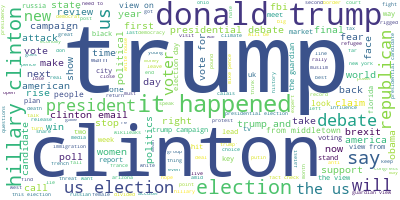

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['headlines_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Prepare text for LDA Analysis

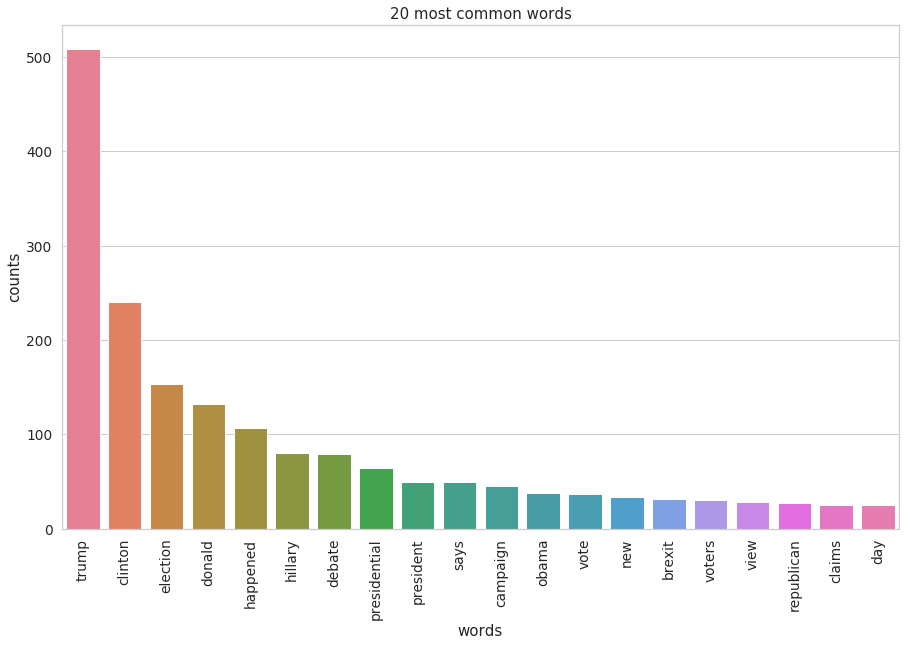

In [51]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['headlines_processed'])
# Visualise the 10 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [52]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
trump election donald clinton says happened new campaign view time

Topic #1:
trump president happened clinton says vote brexit claims like sexual

Topic #2:
clinton trump happened debate election hillary presidential 2016 vote donald

Topic #3:
trump clinton hillary donald debate presidential election voters campaign obama

Topic #4:
trump election clinton presidential vote donald view state time debate


In [58]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')


/home/rmh/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: write() argument must be str, not bytes